In [1]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv
import re
from datetime import datetime

import os.path
from os import path
import time

# import sklearn
# import scipy

# from sklearn.naive_bayes import GaussianNB
# import lightgbm as lightgbm
# from xgboost import XGBClassifier
# import keras

# Get Started
# https://github.com/Refinitiv-API-Samples/Article.EikonDataAPI.DotNet.Library
# API limits
# https://developers.refinitiv.com/en/api-catalog/eikon/eikon-data-api/documentation?content=49692&type=documentation_item
import eikon as ek 

from pylab import rcParams
plt.rcParams['figure.figsize'] = 16, 8

In [2]:
fontsize_reg = 12
fontsize_title = 16
from pylab import rcParams
rcParams['figure.facecolor'] = '1'
rcParams['figure.figsize'] = [8.0, 3.5]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 600

rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'large'

In [3]:
# зададим API ключ
ek.set_app_key('ccebd1ff788d4574818be93e35c4741925ac214e')

In [4]:
rics_german_df = pd.read_excel('C:/DAN/t_systems/trade_project/rics_german_excel.xlsx')
sort_cols = ['DAX', 'German_telecom', 'Company Market Cap']
rics_german_df = rics_german_df.sort_values(by=sort_cols, ascending=False)
rics_german_df.index = range(0, len(rics_german_df))
rics_german_df

,ric,Company Common Name,Country of Exchange,Primary Country of Risk,TRBC Industry Group Name,TRBC Industry Name,Price Close,Company Market Cap,DAX,German_telecom
0,DTEGn.DE,Deutsche Telekom AG,Germany,Germany,Telecommunications Services,Integrated Telecommunications Services,18.032030,8.580246e+10,1,1
1,SAPG.DE,SAP SE,Germany,Germany,Software & IT Services,Software,122.335901,1.501916e+11,1,0
2,SIEGn.DE,Siemens AG,Germany,Germany,Consumer Goods Conglomerates,Consumer Goods Conglomerates,139.347250,1.183675e+11,1,0
3,ALVG.DE,Allianz SE,Germany,Germany,Insurance,Multiline Insurance & Brokers,235.534278,9.704549e+10,1,0
4,VOWG_p.DE,Volkswagen AG,Germany,Germany,Automobiles & Auto Parts,Auto & Truck Manufacturers,182.653284,9.619011e+10,1,0
...,...,...,...,...,...,...,...,...,...,...
1486,IXM0392.DE,MSCI Pac ex Jap ETF,Germany,NaN,NaN,NaN,164.045417,NaN,0,0
1487,IXM0402.DE,MSCI Canada ETF,Germany,NaN,NaN,NaN,147.258410,NaN,0,0
1488,IXM0422.DE,MSCI USA ETF,Germany,NaN,NaN,NaN,368.704250,NaN,0,0
1489,IXM0432.DE,MSCI Jap ETF,Germany,NaN,NaN,NaN,179.058138,NaN,0,0


In [5]:
condition_german = rics_german_df['Country of Exchange'] == 'Germany'
condition_telecom = rics_german_df['TRBC Industry Group Name'] == 'Telecommunications Services'
rics_german_telekom_df = rics_german_df[condition_german & condition_telecom]
rics_german_telekom_df[['ric', 'Company Common Name', 'Company Market Cap', 'DAX', 'German_telecom']]

,ric,Company Common Name,Company Market Cap,DAX,German_telecom
0,DTEGn.DE,Deutsche Telekom AG,8.580246e+10,1,1
27,O2Dn.DE,Telefonica Deutschland Holding AG,8.088962e+09,0,1
28,UTDI.DE,United Internet AG,7.962405e+09,0,1
29,DRIG.DE,1&1 Drillisch AG,4.331541e+09,0,1
30,FNTGn.DE,freenet AG,2.614030e+09,0,1
31,TC1n.DE,Tele Columbus AG,3.688837e+08,0,1
32,NFN.DE,NFON AG,3.245050e+08,0,1
33,E4CG.DE,Ecotel Communication AG,3.558930e+07,0,1
34,PH6.F,Philion SE,2.065664e+05,0,1


In [6]:
condition_dax= rics_german_df['DAX'] == 1
rics_dax = rics_german_df[condition_dax]
rics_dax[['ric', 'Company Common Name', 'Company Market Cap', 'DAX', 'German_telecom']]

,ric,Company Common Name,Company Market Cap,DAX,German_telecom
0,DTEGn.DE,Deutsche Telekom AG,8.580246e+10,1,1
1,SAPG.DE,SAP SE,1.501916e+11,1,0
2,SIEGn.DE,Siemens AG,1.183675e+11,1,0
3,ALVG.DE,Allianz SE,9.704549e+10,1,0
4,VOWG_p.DE,Volkswagen AG,9.619011e+10,1,0
5,DAIGn.DE,Daimler AG,7.532200e+10,1,0
6,BASFn.DE,BASF SE,7.222737e+10,1,0
7,ADSGn.DE,Adidas AG,7.062461e+10,1,0
8,DPWGn.DE,Deutsche Post AG,5.932596e+10,1,0
9,BMWG.DE,Bayerische Motoren Werke AG,5.780708e+10,1,0


In [7]:
def get_name_of_latest_file_in_folder(folder_name):
    files_creation_dates = pd.DataFrame(data = [], columns=[
        "folder_name", "file_name", "num_time", "str_time"
    ])

    files_creation_dates['file_name'] = os.listdir(folder_name)
    files_creation_dates['folder_name'] = folder_name
    files_creation_dates['file_folder_and_name'] = files_creation_dates['folder_name'] + files_creation_dates['file_name']
    files_creation_dates
    for i in range(0, len(files_creation_dates)):
        file_folder_and_name = files_creation_dates['file_folder_and_name'][i]
        files_creation_dates['num_time'][i] = os.path.getctime(file_folder_and_name)
        files_creation_dates['str_time'][i] = time.ctime(os.path.getctime(file_folder_and_name))

    most_latest_file_dir = files_creation_dates.sort_values(by=['num_time'], ascending=False)['file_folder_and_name'].iloc[0]
    
    return most_latest_file_dir

In [32]:
# Создадим df, в который будем сохранять вообще все новости.

# Можем создать пустой df, куда будем добавлять все новости
# all_headlines_df = pd.DataFrame(data = [], columns=["ric", "versionCreated", "headline", "storyId", "sourceCode", "story"])

# Но если мы уже сохраняли файл, достанем самый свежий из папки
most_latest_file = get_name_of_latest_file_in_folder('C:/DAN/t_systems/trade_project/backup_headlines/')
all_headlines_df = pd.read_csv(most_latest_file, sep='~')
all_headlines_df['versionCreated'] = pd.to_datetime(all_headlines_df['versionCreated'])
print(all_headlines_df.shape, most_latest_file)

(3293, 6) C:/DAN/t_systems/trade_project/backup_headlines/all_headlines_df_2020-12-24_v1.csv


In [33]:
# Создадим подобие logger'а 

# quasi_logger = pd.DataFrame(data = [], columns=[
#     'ric_i', 'ric_now', 'headlines_slice_i', 'headlines_number',
#     'up_to_date_ric', 'story_i', 'story_id_now', 'story_is_success', 
#     'date_time',
# ])

# Так как у нас уже есть созданный logger, подгрузим его
most_latest_file = get_name_of_latest_file_in_folder('C:/DAN/t_systems/trade_project/logger/')
quasi_logger = pd.read_csv(most_latest_file, sep=';')
print(quasi_logger.shape, most_latest_file)

(3506, 9) C:/DAN/t_systems/trade_project/logger/quasi_logger_2020-12-28_v14.csv


In [35]:
# Зададим, по какому df мы будет итерировать ric компании (её код на бирже).
rics_to_loop_df = rics_german_telekom_df
rics_to_loop_df = rics_to_loop_df.reset_index(drop=True) # чтобы юзать .loc()

# Зададим переменную, котролирующую количество выгружаемых за раз заголовков
headlines_count_to_request = 100

# Первый цикл будет итерировать компании.
for ric_i in range(0, len(rics_to_loop_df)): # range(0, len(rics_to_loop_df))
    
    # Зададим переменную, которая скажет, какой сейчас итерируется ric.
    ric_now = rics_to_loop_df.loc[ric_i, "ric"]
    print(ric_i, ric_now)
    
    # Цикл, который прогоняет запросы заголовков.
    # Зададим для него параметр. Прибавим +1, если исчерпали новости.
    last_headlines_request = False
    # Будем вести счёт итерацию цикла While для выгрузки заголовков
    headlines_slice_i = 0
    # Для выкачивания заголовков нужно задать дату, до которой делаем запрос.
    # Если такого ric нет в all_headlines_df со всеми новостями,
    # то не будет задавать дату, до которой выкачивать заголовки.
    # Если такой ric есть в all_headlines_df со всеми новостями,
    # то возьмём минимальную дату из all_headlines_df со всеми новостями
    while not last_headlines_request:
        # Проверим, содержит ли all_headlines_df наш текущий ric
        is_this_ric_in_all = ric_now in list(all_headlines_df['ric'])
        print()
        print('is_this_ric_in_all:', is_this_ric_in_all, end=' ')
        if is_this_ric_in_all:
            # Если в нашем датасете присутствует этот ric,
            # то продолжаем по нему выгружать, берём мин имеющуюся дату.
            up_to_date_ric = str(all_headlines_df[all_headlines_df['ric'] == ric_now]['versionCreated'].min())
            print('  up_to_date_ric:', up_to_date_ric, end=' ')
        else:
            # None означает, что метод возьмёт текущий момент времени.
            up_to_date_ric = None
            print('  up_to_date_ric:', up_to_date_ric, end=' ')
        
        news_get_df = ek.get_news_headlines(
            query=ric_now,
            count=headlines_count_to_request,
            date_to=up_to_date_ric
        )
        print('news_get_df.shape:', news_get_df.shape[0])
        
        # Подготовим news_get_df для добавления текст новостей story
        # Для этого добавим столбцы ric, story, тзменим название для headline.
        news_get_df = news_get_df.reset_index(drop=True) # чтобы юзать .loc()
        news_get_df['ric'] = ric_now
        news_get_df['story'] = np.nan
        news_get_df['headline'] = news_get_df['text']
        news_get_df = news_get_df.drop(columns=['text'])
        
        # Добавим тексты новостей к news_get_df по storyId
        for story_i in range(0, len(news_get_df)): # range(0, len(news_get_df))
            story_id_now = news_get_df.loc[story_i, 'storyId']
            
            try:
                story_now = ek.get_news_story(story_id_now)
                # Удалим из истории все тильды на всякий случай.
                story_now = story_now.replace("~","!tilda!")
                # Внесём выкаченную историю в df
                news_get_df.loc[story_i, 'story'] = story_now
                # Пометим, что мы успешно выкачали текст новости
                story_is_success = True
                print(story_i, end='; ')
            
            except:
                story_is_success = False
                # Выведем story с ошибкой
                print()
                print(
                    'STORY IS OK:', story_is_success, 
                    '  ric_now:', ric_now,
                    '  ric_i:', ric_i,
                    '  story_i:', story_i
                    )
                time.sleep(5)
            
            finally:
                # В любом случае внесём в наш квази-логгер наблюдение story.
                quasi_logger = quasi_logger.append({
                    "ric_i": ric_i,
                    "ric_now": ric_now,
                    "headlines_slice_i": headlines_slice_i,
                    "headlines_number": headlines_number,
                    "up_to_date_ric": up_to_date_ric,
                    "story_i": story_i,
                    "story_id_now": story_id_now,
                    "story_is_success": story_is_success,
                    "date_time": str(datetime.today())
                }, ignore_index = True)
        
        # Если загруженных заголовков меньше 100, то мы исчерпали новости
        # и нужно переключиться на ric следующей компании.
        headlines_number = news_get_df.shape[0]
        if headlines_number < 100:
            last_headlines_request = True
        
        headlines_slice_i = headlines_slice_i + 1
        
        # На данный момент news_get_df состоит из заголовков и текстов к ним.
        # Добавим их к большому df со всеми статьями.
        all_headlines_df = all_headlines_df.append(news_get_df, ignore_index = True)
        print()
        print(str(datetime.today()), ric_now, 
              ' ric_i:', ric_i,
              ' headline_slice_i:', headlines_slice_i,
              ' headline_number:', headlines_number,
              ' not null:', news_get_df['story'].notna().sum(),
              up_to_date_ric)
    
    # Сохраним версию логгера
    # Подберём такое название, которого нет в dir, чтобы не переписывать файл.
    file_version = 1
    folder_name = 'C:/DAN/t_systems/trade_project/logger/'
    date_now = datetime.today().strftime("%Y-%m-%d")
    file_name = 'quasi_logger' + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
    while file_name in os.listdir(folder_name):
        file_name = 'quasi_logger' + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
        file_version = file_version + 1
    file_path = folder_name + file_name
    quasi_logger.to_csv(file_path, sep = ';', index=False)
    print(file_path)
    
    # Сохраним версию all_headlines_df со всеми новостями
    # Подберём такое название, которого нет в dir, чтобы не переписывать файл.
    file_version = 1
    folder_name = 'C:/DAN/t_systems/trade_project/backup_headlines/'
    date_now = datetime.today().strftime("%Y-%m-%d")
    file_name = 'all_headlines_df' + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
    while file_name in os.listdir(folder_name):
        file_name = 'all_headlines_df' + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
        file_version = file_version + 1
    # C:/DAN/t_systems/trade_project/backup_headlines/all_headlines_df_2020-12-24_v6.csv
    file_path = folder_name + file_name
    all_headlines_df.to_csv(file_path, sep = '~', index=False)
    print(file_path)

0 DTEGn.DE
is_this_ric_in_all: True   up_to_date_ric: 2019-09-24 14:05:48.494000+00:00 news_get_df.shape: 0

2020-12-28 23:44:55.975201 DTEGn.DE  ric_i: 0  headline_slice_i: 1  headline_number: 0  not null: 0 2019-09-24 14:05:48.494000+00:00
C:/DAN/t_systems/trade_project/logger/quasi_logger_2020-12-28_v16.csv
C:/DAN/t_systems/trade_project/backup_headlines/all_headlines_df_2020-12-28_v2.csv
1 O2Dn.DE
is_this_ric_in_all: True   up_to_date_ric: 2019-12-11 07:19:28+00:00 news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2020-12-28 23:48:36.611926 O2Dn.DE  ric_i: 1  headline_slice_i: 1  headline_number: 100  not null: 100 2019-12-1

KeyboardInterrupt: 

In [45]:
all_headlines_df.tail(10)

,ric,versionCreated,headline,storyId,sourceCode,story
4111,O2Dn.DE,2019-10-15 13:03:28.967000+00:00,GERMANY'S BNETZA NETWORK REGULATOR SAYS ANY D...,urn:newsml:reuters.com:20191015:nS8N26A02N:5,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
4112,O2Dn.DE,2019-10-15 13:02:07.364000+00:00,GERMANY'S BNETZA NETWORK REGULATOR SAYS A SEC...,urn:newsml:reuters.com:20191015:nS8N26A02N:3,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
4113,O2Dn.DE,2019-10-15 13:01:43.268000+00:00,GERMANY'S BNETZA NETWORK REGULATOR ON SECURITY...,urn:newsml:reuters.com:20191015:nS8N26A02N:1,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
4114,O2Dn.DE,2019-10-14 13:53:18+00:00,"Germania, nuove regole 5G lasciano aperta port...",urn:newsml:reuters.com:20191014:nL5N26Z41I:1,NS:RTRS,"<div class=""storyContent"" lang=""it""><style typ..."
4115,O2Dn.DE,2019-10-11 07:07:51+00:00,BUZZ-Telefonica Deutschland: SocGen upgrades a...,urn:newsml:reuters.com:20191011:nL5N26W15Q:1,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
4116,O2Dn.DE,2019-10-11 06:12:00.375000+00:00,TELEFONICA DEUTSCHLAND <O2Dn.DE>: SOCIETE GENE...,urn:newsml:reuters.com:20191011:nFWN26V0LO:1,NS:RTRS,"<div class=""storyContent"" lang=""en""></div>"
4117,O2Dn.DE,2019-10-02 14:30:00.322000+00:00,O2 (Telefónica UK) choisit MDS Global pour opt...,urn:newsml:reuters.com:20191002:nBwNsS56a:1,NS:BSW,"<div class=""storyContent"" lang=""fr""><style typ..."
4118,O2Dn.DE,2019-09-30 16:57:02.654000+00:00,O2.Capital Announces New President in Wake of ...,urn:newsml:reuters.com:20190930:nGNX9B2rRd:1,NS:GNW,"<div class=""storyContent"" lang=""en""><style typ..."
4119,O2Dn.DE,2019-09-30 14:30:15.844000+00:00,Telefonica Deutschland Modernizes Transport Ne...,urn:newsml:newsroom:20190930:nNRA9u4ymv:0,NS:CMNW,"<div class=""storyContent"" lang=""en""><style typ..."
4120,O2Dn.DE,2019-09-30 12:00:13.592000+00:00,Telefónica Deutschland Modernizes Transport Ne...,urn:newsml:reuters.com:20190930:nGNX9LqhyK:1,NS:GNW,"<div class=""storyContent"" lang=""en""><style typ..."


<AxesSubplot:>

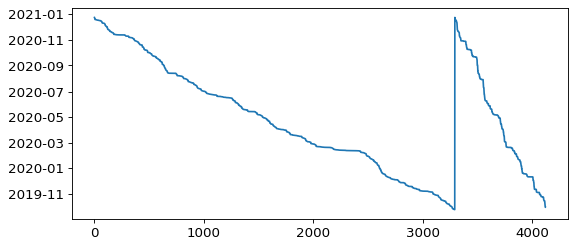

In [44]:
all_headlines_df['versionCreated'].plot()

In [123]:
# Сохранить версию all_headlines_df
file_version = 1
folder_name = 'C:/DAN/t_systems/trade_project/backup_headlines/'
date_now = datetime.today().strftime("%Y-%m-%d")
file_name = 'all_headlines_df' + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
while file_name in os.listdir(folder_name):
    file_name = 'all_headlines_df' + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
    file_version = file_version + 1
# C:/DAN/t_systems/trade_project/backup_headlines/all_headlines_df_2020-12-24_v6.csv
file_path = folder_name + file_name
all_headlines_df.to_csv(file_path, sep = '~', index=False)
print(file_path)

C:/DAN/t_systems/trade_project/backup_headlines/all_headlines_df_2020-12-28_v6.csv
